In [1]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr 
from numpy.polynomial.polynomial import polyfit
import helperFunc as hf

# Functions

In [2]:
def bestLinearFitQ1Q2NormalVsLognormal(Q,p,tauTupleDict,rewiringsTuple = (4000,4000),filePath = False):

    LW = 3; corP = {}
    xmin,xmax = 0.08, 0.81; xValues = np.array([xmin,xmax])   
    weightDist = ['normal','lognormal']; colors = [ 'orange', 'green']; alphas = [0.2,0.2]; markers = ['s','v']
    
    plt.rcParams['figure.figsize'] = [5, 5]
    fig = plt.figure(); ax = fig.add_subplot(111)
    ## This is the key.  elements with zorder < 1 will be rasterized
    ax.set_rasterization_zorder(1) 
    
    bias = {}
    slope = {}
    for ind,wD in enumerate(weightDist):
        
        bias[wD], slope[wD] = polyfit(Q[(wD,p)][p,tauTupleDict[wD,p],rewiringsTuple][1], Q[(wD,p)][p,tauTupleDict[wD,p],rewiringsTuple][2],1)
        
        ax.scatter(Q[(wD,p)][p,tauTupleDict[wD,p],rewiringsTuple][1],Q[(wD,p)][p,tauTupleDict[wD,p],rewiringsTuple][2]
                   ,alpha = alphas[ind],color = colors[ind], marker = markers[ind], zorder=0)
        ax.plot(xValues, bias[wD] + slope[wD] * xValues,color =colors[ind],linewidth=LW,zorder=0)
        plt.xlim(xmin, xmax);plt.ylim(xmin, xmax) 
        
        corP[wD] = pearsonr(Q[(wD,p)][p,tauTupleDict[wD,p],rewiringsTuple][1], Q[(wD,p)][p,tauTupleDict[wD,p],rewiringsTuple][2])
        
    print('for p = %f'%p)
    for wD in weightDist:
        tx = 'For '+wD+' networks, the Pearson correlation coef is '+str(corP[wD][0])+'with p='+ str(corP[wD][1])
        tx2 = 'For '+wD+' networks, the bias is '+str(bias[wD])+'and the slope '+ str(slope[wD])
        print(tx)   
        print(tx2)
        

    if filePath is not False:
        directory = os.path.dirname(filePath)
        if not os.path.exists(directory):  # makes the directory if it does not exist
            os.makedirs(directory)
        fig.savefig(filePath, rasterized=True, dpi=1200) 
        
        

## Load Q and do the scatter plot Q8000 as a function of Q4000 for lognormal vs normal 

In [3]:

directoryQLoad = 'data/ModularityValues/1000iterations/QrandQ4000Q8000/'
filePathQLoad = directoryQLoad + 'Q0Q1Q2.pckl'
Q = hf.loadVar(filePathQLoad) 

tausTrans = {};tausTrans['normal',0] = (4.2,4.2); tausTrans['lognormal',0] = (5.8,5.8)
tausTrans['normal',0.2] = (4.15,4.15);tausTrans['lognormal',0.2] = (5.5,5.5)

tausModu = {};tausModu['normal',0] = (4.2,3);tausModu['lognormal',0] = (5.8,4.5)
tausModu['normal',0.2] = (4.15,3); tausModu['lognormal',0.2] = (5.5,4.5)

tausCentra = {};tausCentra['normal',0] = (4.2,5);tausCentra['lognormal',0] = (5.8,7)
tausCentra['normal',0.2] = (4.15,5);tausCentra['lognormal',0.2] = (5.5,7)

p = 0.2

for p = 0.200000
For normal networks, the Pearson correlation coef is 0.6674124852936959with p=6.4250886905377e-130
For normal networks, the bias is 0.537745330965587and the slope 0.21419806889176396
For lognormal networks, the Pearson correlation coef is 0.4620817694380635with p=4.8332200361048973e-54
For lognormal networks, the bias is 0.43088542953361936and the slope 0.3079933086268444
**************************
t(test) = t(modular)
**************************


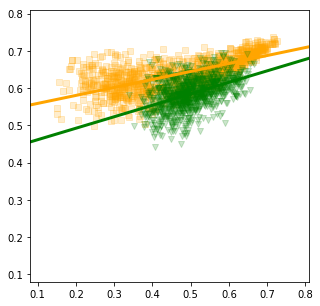

In [4]:

bestLinearFitQ1Q2NormalVsLognormal(Q,p,tausModu,(4000,4000))
print('**************************')
print('t(test) = t(modular)')
print('**************************')

for p = 0.200000
For normal networks, the Pearson correlation coef is 0.8984684851208867with p=0.0
For normal networks, the bias is 0.2520295072394025and the slope 0.628130188328726
For lognormal networks, the Pearson correlation coef is 0.6907252678965605with p=1.1293012150239252e-142
For lognormal networks, the bias is 0.2524644685515013and the slope 0.6006679490540773
**************************
t(test) = t(transition)
**************************


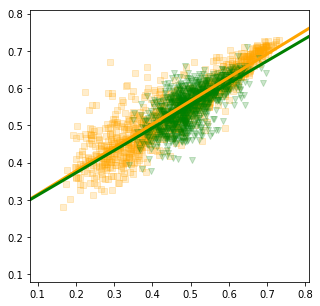

In [5]:

bestLinearFitQ1Q2NormalVsLognormal(Q,p,tausTrans,(4000,4000))
print('**************************')
print('t(test) = t(transition)')
print('**************************')


for p = 0.200000
For normal networks, the Pearson correlation coef is 0.9447897015255554with p=0.0
For normal networks, the bias is 0.07208221664521892and the slope 0.9072723819104437
For lognormal networks, the Pearson correlation coef is 0.6222275139851625with p=3.099799097666694e-108
For lognormal networks, the bias is 0.058276194417789716and the slope 0.7823887358082016
**************************
t(test) = t(centralized)
**************************


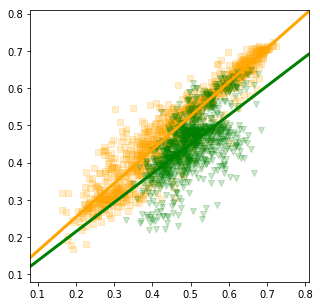

In [6]:
bestLinearFitQ1Q2NormalVsLognormal(Q,p,tausCentra,(4000,4000))
print('**************************')
print('t(test) = t(centralized)')
print('**************************')
